In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import tensorflow_probability as tfp

In [2]:
def F3(x):
  # x : starting point numpy array
  x = tf.convert_to_tensor(x, dtype= 'float64')

  tfd = tfp.distributions

  both_prisoners = np.array([0., 0.])
  var = np.array([[2., 0.],[0.,2.]])
  
  both_prisoners = tfd.MultivariateNormalFullCovariance(both_prisoners, var)


  prisonerA = np.array([5.,0.])
  var1 = np.array([[2.,0.],[0.,2.]])
  prisonerA = tfd.MultivariateNormalFullCovariance(prisonerA, var1)


  prisonerB = np.array([0.,5.])
  var2 = np.array([[2.,0.],[0.,2.]])
  prisonerB = tfd.MultivariateNormalFullCovariance(prisonerB, var2)


  # mean3 = np.array([4.,-7.5])
  # var3 = np.array([[8.,0],[0.,8.]])
  # rv3 = tfd.MultivariateNormalFullCovariance(mean3, var3)

  pos = x
  with tf.GradientTape(persistent= True) as g:
    g.watch(pos)
    Z = 2*both_prisoners.prob(pos) +  prisonerA.prob(pos) + prisonerB.prob(pos)
  grad = g.gradient(Z, pos)

  grad = grad.numpy()
  return Z, grad

Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.


Text(0.5, 0, 'Reward')

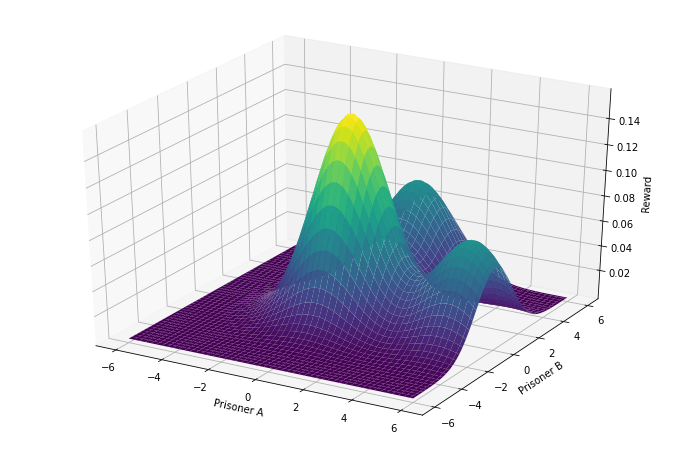

In [3]:
x = np.linspace(-6,6,100)
y = np.linspace(-6,6,100)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X  
pos[:, :, 1] = Y
c = tf.convert_to_tensor(pos)
Z,_ = F3(c)


fig = plt.figure(figsize= (12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis',linewidth=0)
ax.set_xlabel('Prisoner A')
ax.set_ylabel('Prisoner B')
ax.set_zlabel('Reward')

In [25]:
def Rmsprop_2d(func, points,  max_iter = 100, beta = 0.9, step = 0.01):
  end_points_x = []
  end_points_y = []
  end_points_x.append(points[0])
  end_points_y.append(points[1])
  points = points.astype(float)
  grad_sq = np.zeros((2, max_iter + 1))
  for i in range(max_iter):
    _,grad = func(points)
    grad_sq[0][i+1] = grad_sq[0][i] * beta + (1- beta) * np.square(grad[0]) 
    grad_sq[1][i+1] = grad_sq[1][i] * beta + (1- beta) * np.square(grad[1])
    points[0] = points[0] + step* grad[0]/np.sqrt(grad_sq[0][i+1]) 
    points[1] = points[1] + step* grad[1]/np.sqrt(grad_sq[1][i+1]) 
    end_points_x.append(points[0])
    end_points_y.append(points[1])
  return points, end_points_x, end_points_y

In [68]:
# def a1(func, points, max_iter = 20, step = 0.1, max_step = 1, min_step = 0.01, algo = 1):
#     # func : 3d function
#     # max_iter : maximum no of iteration
#     # step :  step size
#     # max_step : maximum step size
#     # min_step : minimum step size

#   points = points.astype(float)
#   last_grad = 0
#   end_points = []

#   for i in range(max_iter + 1):
#     _, grad = func(points)
#     grad = grad[algo - 1]
#     if i==0:
#       last_grad = grad
#       continue
#     if last_grad*grad >0:
#       step = min(1.2*step, max_step)
#     else:
#       step = max(0.5*step, min_step)
#     points[algo - 1] = points[algo - 1] + step* grad
#     last_grad = grad
#     end_points.append(points[algo - 1])
#   end_points = np.asarray(end_points)
#   return points, end_points

In [5]:
def Adagrad(func, points, max_iter = 20, step = 0.1, algo = 1):
  points = points.astype(float)
  end_points = []
  eta = 10**-8
  grad_sq = np.zeros(max_iter + 1)
  for i in range(max_iter):
    _, grad = func(points)
    grad = grad[algo - 1]
    grad_sq[i + 1] = grad_sq[i] + np.square(grad)
    points[algo - 1] = points[algo - 1] + (step * grad)/np.sqrt(grad_sq[i + 1] + eta)
    end_points.append(points[algo - 1])
  return points, end_points


In [6]:
def Adam(func, points, max_iter = 20, step = 0.1, algo = 2, beta1 = 0.9, beta2 = 0.999):
  points = points.astype(float)
  end_points = []
  eta = 10**-8
  momentum = np.zeros(max_iter + 1)
  square = np.zeros(max_iter + 1)
  for i in range(max_iter):
    _, grad = func(points)
    grad = grad[algo - 1]
    momentum[i + 1] = beta1 * momentum[i] + (1 - beta1) * grad
    square[i + 1] = beta2 * square[i] + (1 - beta2) * np.square(grad)
    mbar = momentum[i + 1]/(1 - beta1)
    vbar = square[i + 1]/(1 - beta2)
    points[algo - 1] = points[algo - 1] + (step * mbar)/(np.sqrt(vbar) + eta)
    end_points.append(points[algo - 1])
  return points, end_points

In [70]:
# def a2(func, points,  beta = 0.9, max_iter = 20, step = 0.1, algo = 2):
#     # Momentum
#     # func : 3d function
#     # beta : momentum coefficient
#     # max_iter : maximum no of iteration
#     # step :  step size

#     ## return:
#     # start point and their respective end points after (max_iter) number of iterations

#   points = points.astype(float)
#   end_points = []
#   z = np.zeros(max_iter+1)
#   for i in range(max_iter):
#     _, grad = func(points)
#     grad = grad[algo - 1]
#     z[i+1] = beta * z[i] + grad
#     points[algo - 1] = points[algo - 1]  + step * z[i+1]
#     end_points.append(points[algo - 1])
#   end_points = np.asarray(end_points)
#   return points, end_points

In [7]:
pts = np.array([4, -4])
max_iter = 100
step = 0.2
_, e1 = Adagrad(F3, pts, max_iter= max_iter, step = step)
_, e2 = Adam(F3, pts, max_iter= max_iter, step = step)
_, e3x, e3y = Rmsprop_2d(F3, pts, max_iter = max_iter, step = step)

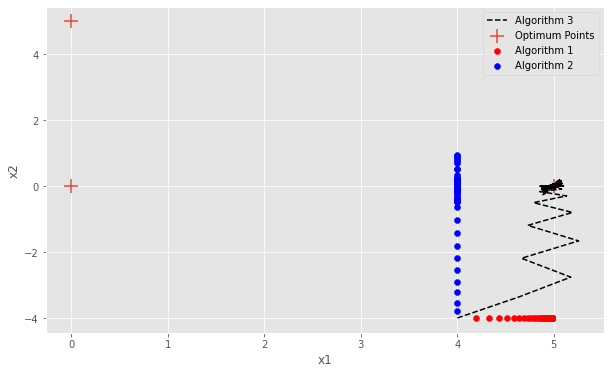

In [20]:
xx = np.ones(max_iter)
plt.figure(figsize= (10,6))
plt.style.use('ggplot')
plt.scatter([0, 0, 5], [0, 5, 0], marker = '+', s = 180, label = 'Optimum Points')
plt.scatter(e1, pts[1]*xx, c = 'r', label = 'Algorithm 1')
plt.scatter(pts[0]*xx, e2,  c = 'b', label = 'Algorithm 2')
plt.plot(e3x, e3y ,c = 'k', label = 'Algorithm 3', linestyle = '--')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

In [14]:
len(e3y)

101

In [23]:
diff_x = []
diff_y = []
for x1, x11, x2, x22 in zip(e1, e3x[1:], e2, e3y[1:]):
  diff_x.append(np.abs(x1 - x11))
  diff_y.append(np.abs(x2 - x22))

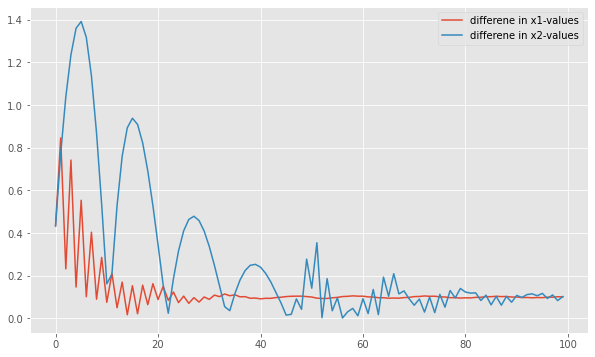

In [24]:
plt.figure(figsize= (10,6))
plt.plot(np.arange(max_iter), diff_x, label = 'differene in x1-values')
plt.plot(np.arange(max_iter), diff_y, label = 'differene in x2-values')
plt.legend()

 imagine two car manufacturers, Row Cars and Col Motors. As the only two actors in their market, the price each sells cars at has a direct connection to the price the other sells cars at. If one opts to sell at a higher price than the other, they will sell fewer cars as customers transfer. If one sells at a lower price, they will sell more cars at a lower profit margin, gaining customers from the other. In Peterson’s example, if both set their prices high, both will make 100 million per year. Should one decide to set their prices lower, they will make 150 million while the other makes nothing. If both set low prices, both make 20 million. Peterson writes: